In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head(3)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


#### Implementing UCB

In [78]:
import math
import pandas as pd

# Assuming df is a pandas DataFrame with rewards for each ad (rows are rounds, columns are ads)
# Example: df = pd.DataFrame(...)

N = 10000  # Total number of samples (rounds)
ad_num = 10  # Number of ads
ads_selected = []  # Full list of the ads selected over the round
number_of_selection = [0] * ad_num  # Number of times each ad was selected
sum_of_rewards = [0] * ad_num  # Sum of rewards for each ad
total_reward = 0  # Total reward

# Loop through rounds
for i in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    # Loop through each ad
    for j in range(0, ad_num):
        if number_of_selection[j] > 0:
            # Calculate average reward and confidence bound
            average_reward = sum_of_rewards[j] / number_of_selection[j]
            conf_bound = math.sqrt(3 / 2 * math.log(i + 1) / number_of_selection[j])
            upper_bound = average_reward + conf_bound
        else:
            upper_bound = 1e400  # Set to a large value for ads not yet selected

        # Choose the ad with the highest upper confidence bound
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j

    ads_selected.append(ad)
    number_of_selection[ad] += 1

    # Get the reward for the selected ad
    reward = df.values[i, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

# At the end, you will have:
# - `ads_selected`: a list of the ads selected at each round
# - `total_reward`: the cumulative reward


#### Visualising

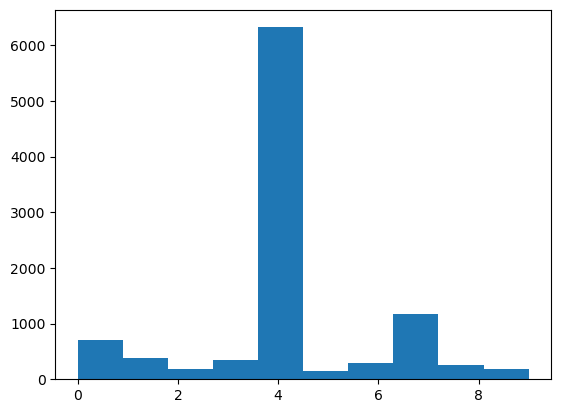

In [80]:
plt.hist(ads_selected)
plt.show()